# Coding Etiquette & Excel Reporting
## Content: 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path

path = r'C:\Users\thoms\Desktop\Data Analytics\Achievement 4\Instacart Basket Analysis'

In [3]:
# Import orginal df to check of orders, products, customers and prior 

orders_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))

In [4]:
orders_original.shape

(3421083, 7)

In [5]:
products_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))

In [6]:
products_original.shape

(49693, 5)

In [7]:
customers_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [8]:
customers_original.shape

(206209, 10)

In [9]:
prior_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'prior.csv'))

In [10]:
prior_original.shape

(32434489, 4)

In [11]:
# Import df for checked orders, products, customers and prior 

orders_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))

In [12]:
orders_wrangled.shape

(3421083, 8)

In [13]:
prods_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'prods_checked.csv'))

In [14]:
prods_checked.shape

(49677, 6)

In [15]:
# Import and check final df orders products combined

orders_products_combined_1 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined_1.pkl'))

In [16]:
orders_products_combined_1.shape

(32641268, 15)

In [17]:
orders_products_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

In [18]:
orders_products_merged.shape

(32404859, 25)

In [19]:
# Missing values in orginal df

orders_original.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [20]:
products_original.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [21]:
prior_original.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [22]:
customers_original.isnull().sum()

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [23]:
# Check for dulpilcates in original df

customers_original.duplicated().sum()

0

In [24]:
prior_original.duplicated().sum()

0

In [25]:
products_original.duplicated().sum()

5

In [26]:
orders_original.duplicated().sum()

0

In [27]:
orders_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [28]:
department_original = pd.read_csv (r'C:\Users\thoms\Desktop\Data Analytics\Achievement 4\Instacart Basket Analysis\02 Data\Original Data\departments.csv', index_col = False)

## Key question 1: The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

Text(0, 0.5, 'amount in millions')

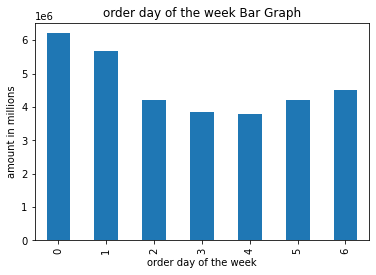

In [29]:
# Show the graph for the busiest days of the week 

bar = orders_prods_custs_merge['order_dow'].value_counts().sort_index().plot.bar()

plt.title('order day of the week Bar Graph')
plt.xlabel("order day of the week")
plt.ylabel("amount in millions")

In [30]:
# Show the graph for the busiest hours of the day

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

Text(0, 0.5, 'amount in millions')

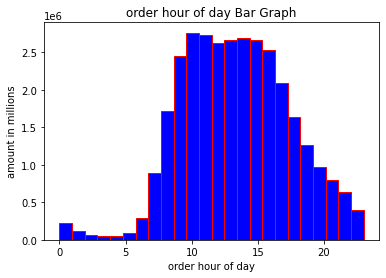

In [31]:
hist_1 = orders_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24, color = "blue", ec="red")


plt.title('order hour of day Bar Graph')
plt.xlabel("order hour of day")
plt.ylabel("amount in millions")

In [32]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_order_hour_of_day.png'))

## Key question 2: They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [33]:
# Average price spent per hour through out the day at Instacart

avg_price_per_hour = orders_prods_custs_merge.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'prices amount')

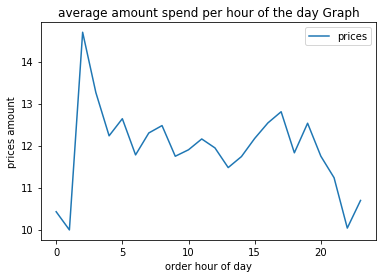

In [34]:
avg_price_per_hour_chart = sns.lineplot(data = avg_price_per_hour)

plt.title('average amount spend per hour of the day Graph')
plt.xlabel("order hour of day")
plt.ylabel("prices amount")

In [35]:
avg_price_per_hour_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avg_price_per_hour_chart.png'))

## Key question 3: Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

In [36]:
# Simple price range calculations

orders_prods_custs_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [37]:
orders_prods_custs_merge['prices'].value_counts(dropna = False)

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 242, dtype: int64

In [38]:
orders_prods_custs_merge = orders_prods_custs_merge.drop(labels=[967639, 960327, 773202, 773188, 531488, 503002, 502980, 502963, 502898, 502941, 286470, 286447, 286436, 129922, 129909 ], axis=0)

In [39]:
orders_prods_custs_merge = orders_prods_custs_merge.drop(orders_prods_custs_merge.index[orders_prods_custs_merge['product_id'] == 21553.0 ])

In [40]:
orders_prods_custs_merge['prices'].describe()

count    3.240042e+07
mean     9.945098e+00
std      4.641173e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [41]:
orders_prods_custs_merge.loc[(orders_prods_custs_merge['prices'] == 99999)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,family_status,income
128911,183964,873,prior,3,0,10,7.0,33664.0,11.0,0.0,...,Regular customer,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220
128924,1851256,873,prior,4,6,12,13.0,33664.0,8.0,1.0,...,Regular customer,Edward,Carr,Male,Colorado,64,2/28/2019,3,married,290220
284218,1915696,1893,prior,1,5,17,NaN,33664.0,10.0,0.0,...,Non frequent customer,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829
284229,2763293,1893,prior,2,4,16,13.0,33664.0,6.0,1.0,...,Non frequent customer,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829
284252,2564805,1893,prior,4,1,17,30.0,33664.0,3.0,1.0,...,Non frequent customer,Christine,Le,Female,Colorado,23,8/27/2019,3,married,348829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32079919,2249946,204099,prior,29,0,8,4.0,33664.0,1.0,0.0,...,Non frequent customer,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
32079936,2363282,204099,prior,31,0,9,2.0,33664.0,1.0,1.0,...,Non frequent customer,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
32125745,3181945,204395,prior,13,3,15,8.0,33664.0,25.0,0.0,...,Regular customer,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004
32255078,2486215,205227,prior,7,3,20,4.0,33664.0,8.0,0.0,...,Non frequent customer,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898


In [42]:
orders_prods_custs_merge = orders_prods_custs_merge.drop(orders_prods_custs_merge.index[orders_prods_custs_merge['product_id'] == 33664])

In [43]:
orders_prods_custs_merge['prices'].describe()

count    3.239972e+07
mean     7.790994e+00
std      4.241810e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Text(0, 0.5, 'products to the price purchase')

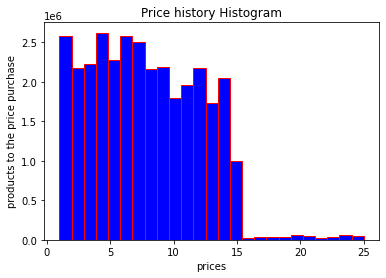

In [44]:
hist_price = orders_prods_custs_merge['prices'].plot.hist(bins = 25, color = "blue", ec="red")

plt.title('Price history Histogram')
plt.xlabel("prices")
plt.ylabel("products to the price purchase")

In [45]:
hist_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price.png'))

In [46]:
def price_label(row):

  if row['prices'] <= 7:
    return 'Low-range product'
  elif (row['prices'] > 7) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [47]:
orders_prods_custs_merge['price_range'] = orders_prods_custs_merge.apply(price_label, axis=1)

In [48]:
orders_prods_custs_merge['price_range'].value_counts (dropna = False)

Mid-range product    16607365
Low-range product    15379801
High range             412551
Name: price_range, dtype: int64

Text(0, 0.5, 'customers in millions')

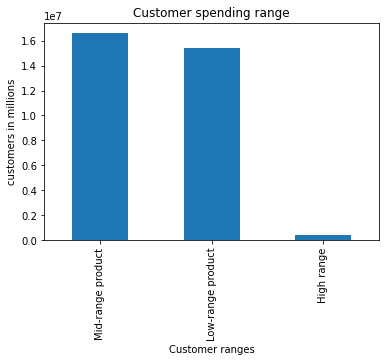

In [49]:
price_range_chart = orders_prods_custs_merge['price_range'].value_counts().plot.bar()

plt.title('Customer spending range')
plt.xlabel("Customer ranges")
plt.ylabel("customers in millions")

In [50]:
price_range_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range.png'))

## Key question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [51]:
departments_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [52]:
# The departments

departments_wrangled.head (21)

,Unnamed: 0,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [53]:
departments_wrangled.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)


In [54]:
departments_wrangled.head (21)

,department_id,department_name
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [56]:
orders_prods_custs_merge_depts = orders_prods_custs_merge.merge(departments_wrangled, on = 'department_id')

Text(0, 0.5, 'Frequency of product purchased')

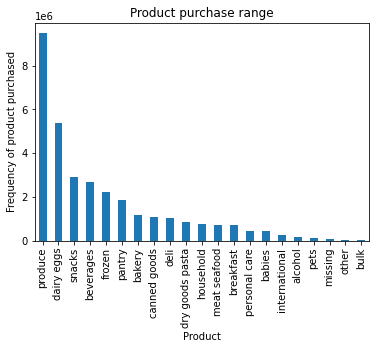

In [57]:
# bar graph of most bought products per department 

bar_dept = orders_prods_custs_merge_depts['department_name'].value_counts().plot.bar()

plt.title('Product purchase range')
plt.xlabel("Product")
plt.ylabel("Frequency of product purchased")

In [58]:
bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

## Key question: 5a


In [60]:
# the loyalty flag for the brand

loyalty = orders_prods_custs_merge_depts['loyalty_flag'].value_counts(dropna = False)

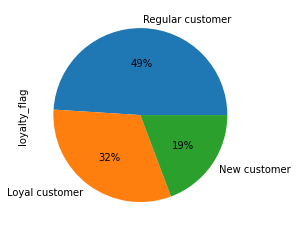

In [61]:
loyalty_chart = loyalty.plot.pie(autopct='%1.0f%%')

In [62]:
loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_chart.png'))

## Key question: 5b

In [63]:
# connection between the amount spent and loyalty

loyalty_ratio = pd.crosstab(orders_prods_custs_merge_depts['loyalty_flag'],orders_prods_custs_merge_depts['spending_flag'], dropna = False)

Text(0, 0.5, 'Frequency of product purchased')

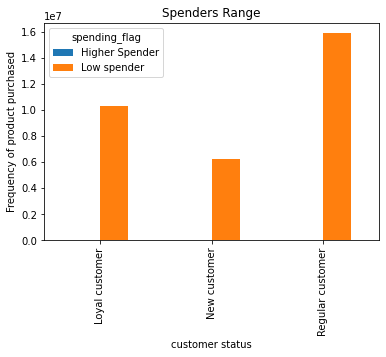

In [93]:
loyalty_ratio_chart = loyalty_ratio.plot.bar()

plt.title('Spenders Range')
plt.xlabel("customer status")
plt.ylabel("Frequency of product purchased")

In [99]:
loyalty_ratio_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_ratio_chart.png'))

# Key question: 5c

In [66]:
# connection between region and the loyalty

# Create groups of states in a region using if statement. 

region = []

for value in orders_prods_custs_merge_depts['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [67]:
orders_prods_custs_merge_depts['region'] = region

In [68]:
loyalty_region = pd.crosstab(orders_prods_custs_merge_depts['loyalty_flag'],orders_prods_custs_merge_depts['region'], dropna = False)

Text(0, 0.5, 'Frequency of product purchased')

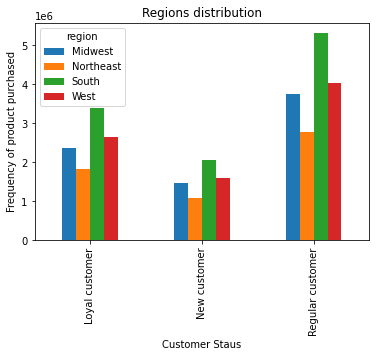

In [94]:
loyalty_region_chart = loyalty_region.plot.bar()

plt.title('Regions distribution')
plt.xlabel("Customer Staus")
plt.ylabel("Frequency of product purchased")

In [98]:
loyalty_region_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region_chart.png'))

# Key question: 5d

In [71]:
loyalty_family = pd.crosstab(orders_prods_custs_merge_depts['loyalty_flag'],orders_prods_custs_merge_depts['family_status'], dropna = False)

Text(0, 0.5, 'Family Status')

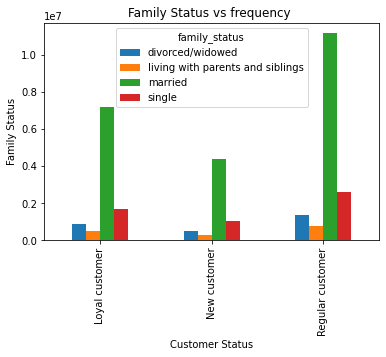

In [95]:
loyalty_family_chart = loyalty_family.plot.bar()

plt.title('Family Status vs frequency ')
plt.xlabel("Customer Status")
plt.ylabel("Family Status")

In [96]:
loyalty_family_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_family_chart.png'))

In [97]:
# Creating an 'age' list

age_profile_list = []

for value in orders_prods_custs_merge_depts['age']:
    if (value >= 18) and (value <= 24):
        age_profile_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_profile_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_profile_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_profile_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_profile_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_profile_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_profile_list.append('75-84')
    elif (value >= 85):
        age_profile_list.append('85+')

In [75]:
# create age list column

orders_prods_custs_merge_depts['age_profile'] = age_profile_list

In [76]:
loyalty_age = pd.crosstab(orders_prods_custs_merge_depts['loyalty_flag'],orders_prods_custs_merge_depts['age_profile'], dropna = False)

Text(0, 0.5, 'Age Frequency')

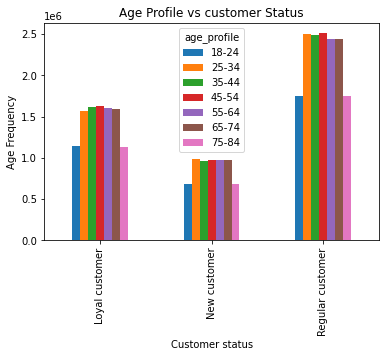

In [101]:
loyalty_age_chart = loyalty_age.plot.bar()

plt.title('Age Profile vs customer Status')
plt.xlabel("Customer status")
plt.ylabel("Age Frequency")

In [102]:
loyalty_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_chart.png'))

In [79]:
family_age = pd.crosstab(orders_prods_custs_merge_depts['family_status'],orders_prods_custs_merge_depts['age_profile'], dropna = False)

Text(0, 0.5, 'Frequency of age')

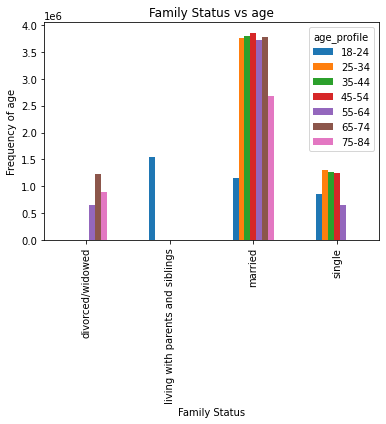

In [103]:
family_age_chart = family_age.plot.bar()

plt.title('Family Status vs age')
plt.xlabel("Family Status")
plt.ylabel("Frequency of age")

In [104]:
family_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_age_chart.png'))

# Key question: 5e


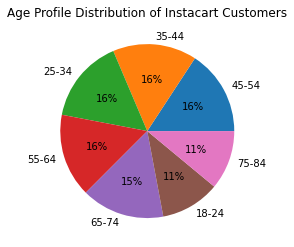

In [105]:
# The ratio of customer vs age

age_demographics = orders_prods_custs_merge_depts['age_profile'].value_counts().plot.pie(autopct='%1.0f%%', ylabel = '', title = 'Age Profile Distribution of Instacart Customers')

In [106]:
age_demographics.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_demographics_chart.png'))

In [107]:
# Create 'income' list

income_profile_list = []

for value in orders_prods_custs_merge_depts['income']:
    if value < 25000:
        income_profile_list.append('0-25000')
    elif (value >= 25000) and (value <= 50000):
        income_profile_list.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_profile_list.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_profile_list.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_profile_list.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_profile_list.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_profile_list.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_profile_list.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_profile_list.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_profile_list.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_profile_list.append('400000-500000')
    elif value >= 500000:
        income_profile_list.append('500000+')

In [108]:
orders_prods_custs_merge_depts['income_profile'] = income_profile_list

Text(0, 0.5, 'Frequency of purchasing')

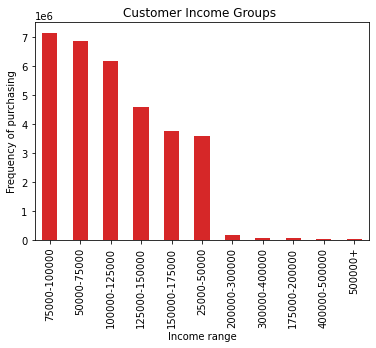

In [109]:
# ratio of income

income = orders_prods_custs_merge_depts['income_profile'].sort_index().value_counts().plot.bar(xlabel = 'Income Group', color = 'tab:red')\

plt.title('Customer Income Groups ')
plt.xlabel("Income range")
plt.ylabel("Frequency of purchasing")

In [110]:
income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_chart.png'))

# Key question: 5f

In [111]:
dependents_frequency = pd.crosstab(orders_prods_custs_merge_depts['number_of_dependents'], orders_prods_custs_merge_depts['days_since_prior_order'], dropna = False)

Text(0, 0.5, 'Number of orders')

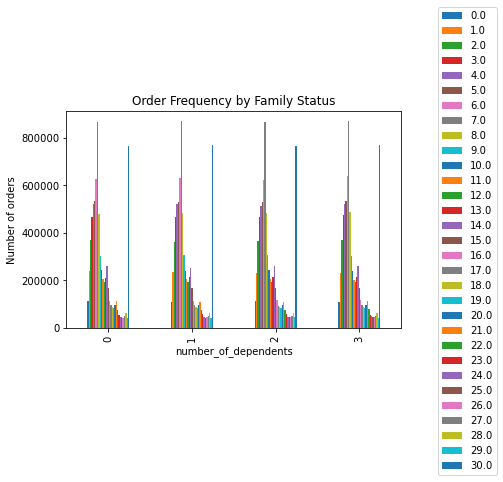

In [112]:
dependents_frequency_chart = dependents_frequency.plot.bar(title = 'Order Frequency by Family Status')
plt.legend(bbox_to_anchor = (1.3, 1.5))

plt.ylabel("Number of orders")

In [113]:
dependents_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_frequency_chart.png'))

Text(0.5, 1.0, 'Age vs Income')

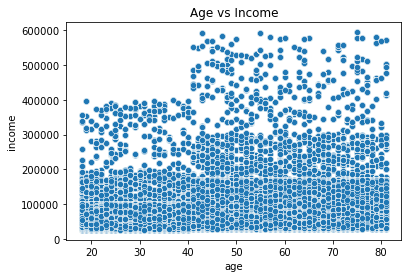

In [114]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = orders_prods_custs_merge_depts)

plt.title('Age vs Income')


In [115]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income_chart.png'))

In [117]:
dependents_time = pd.crosstab(orders_prods_custs_merge_depts['order_hour_of_day'], orders_prods_custs_merge_depts['number_of_dependents'], dropna = False)

Text(0, 0.5, 'number of orders')

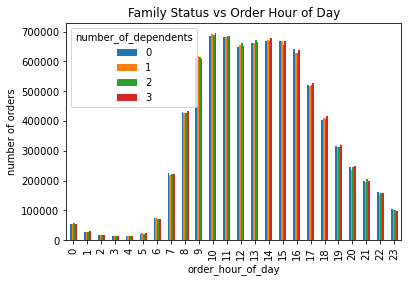

In [118]:
dependents_time = dependents_time.plot.bar()

plt.title('Family Status vs Order Hour of Day')

plt.ylabel("number of orders")

In [119]:
dependents_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_time_chart.png'))

In [120]:
# Export data

orders_prods_custs_merge_depts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_prods_custs_merge_depts.pkl'))